# Monte Carlo simulations on financial data

In [ ]:
import numpy as np
from scipy.stats import norm

def monte_carlo_simulation(stock_price, days, iterations, mean_return, std_dev):
    prices = np.zeros((iterations, days))
    prices[:, 0] = stock_price

    for i in range(1, days):
        prices[:, i] = prices[:, i-1] * np.exp(
            norm.rvs(loc=mean_return, scale=std_dev, size=iterations)
        )

    return prices

# Parameters
stock_price = 2473.05  # Current stock price
days = 30  # Number of days to simulate
iterations = 10000000  # Number of simulations
mean_return = 0.05 / 365  # Daily mean return
std_dev = 0.10 / np.sqrt(365)  # Daily standard deviation

# Run simulation
prices = monte_carlo_simulation(stock_price, days, iterations, mean_return, std_dev)

# Analyze results
mean_price = np.mean(prices[:, -1])
median_price = np.median(prices[:, -1])
percentiles = np.percentile(prices[:, -1], [25, 75])

print(f"Mean price: {mean_price:.2f}")
print(f"Median price: {median_price:.2f}")
print(f"25th Percentile: {percentiles[0]:.2f}")
print(f"75th Percentile: {percentiles[1]:.2f}")

Mean price: 2483.87
Median price: 2482.86
25th Percentile: 2436.09
75th Percentile: 2530.53


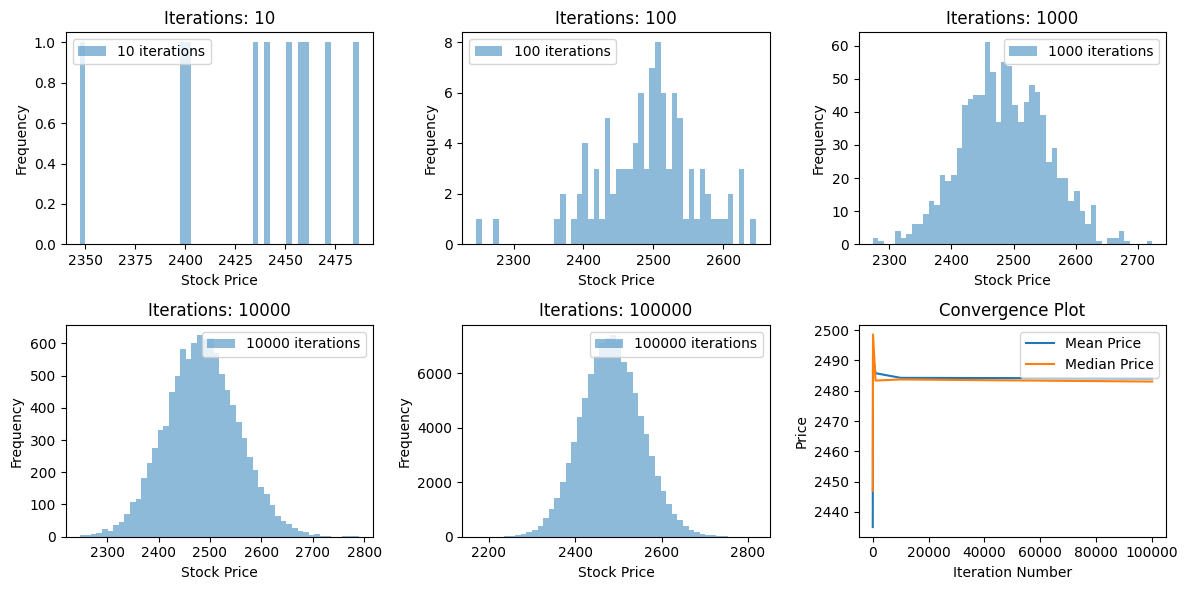

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_simulation(stock_price, days, iterations, mean_return, std_dev):
    prices = np.zeros((iterations, days))
    prices[:, 0] = stock_price
    for i in range(1, days):
        prices[:, i] = prices[:, i-1] * np.exp(
            norm.rvs(loc=mean_return, scale=std_dev, size=iterations)
        )

    return prices
# Parameters
stock_price = 2473.05
days = 30
mean_return = 0.05 / 365
std_dev = 0.10 / np.sqrt(365)

# Run simulation with different iteration numbers
iteration_numbers = [10, 100, 1000, 10000, 100000]
results = []
for iterations in iteration_numbers:
    prices = monte_carlo_simulation(stock_price, days, iterations, mean_return, std_dev)
    results.append(prices[:, -1])  # Store final prices

# Plot histogram for each iteration number
plt.figure(figsize=(12, 6))
for i, iterations in enumerate(iteration_numbers):
    plt.subplot(2, 3, i+1)
    plt.hist(results[i], bins=50, alpha=0.5, label=f"{iterations} iterations")
    plt.xlabel("Stock Price")
    plt.ylabel("Frequency")
    plt.title(f"Iterations: {iterations}")
    plt.legend()

# Plot convergence plot
plt.subplot(2, 3, 6)
plt.plot(iteration_numbers, [np.mean(result) for result in results], label="Mean Price")
plt.plot(iteration_numbers, [np.median(result) for result in results], label="Median Price")
plt.xlabel("Iteration Number")
plt.ylabel("Price")
plt.title("Convergence Plot")
plt.legend()

plt.tight_layout()
plt.show()